In [3]:
import numpy as np # importing numpy
import pandas as pd  # importing pandas
import matplotlib.pyplot as plt # importing matplotlib
import seaborn as sns # importing seaborn
import warnings
warnings.filterwarnings (action='ignore')
from sklearn.feature_selection import SelectKBest  # importing selectkbest
from sklearn.feature_selection import chi2 # importing chi2
from autofeat import AutoFeatClassifier 
from autofeat import FeatureSelector

# Movie

In [14]:
movie_df=pd.read_csv('ml360datasets/Movie_classification.csv') #reading movie classification data
movie_df['Time_taken']=movie_df['Time_taken'].fillna(movie_df['Time_taken'].mean()) #replacing the null values with mean

In [7]:
from sklearn.preprocessing import LabelEncoder #doing the labelencoder for category columns
le = LabelEncoder()
for col in movie_df.columns:
    if (movie_df[col].dtypes == "object"):
        movie_df[col] = movie_df[col].astype(str)
        movie_df[col] = le.fit_transform(movie_df[col])

In [15]:
X=movie_df.iloc[:,:-1] #choosing the features except target variable
Y=movie_df[['Start_Tech_Oscar']] #choosing the target variable

In [9]:
fsel = FeatureSelector(verbose=1,problem_type='classification') # autofeat for classification feature seection
new_X = fsel.fit_transform(X,Y) #fiting the X and y features 

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 11 features after 5 feature selection runs
[featsel] 10 features after correlation filtering
[featsel] 6 features after noise filtering


In [10]:
new_X #We got 6 important features in dataframe

,Budget,Collection,Trailer_views,Producer_rating,Twitter_hastags,Multiplex coverage
0,36524.125,48000.0,527367.0,7.995,223.840,0.462
1,35668.655,43200.0,494055.0,7.470,243.456,0.531
2,39912.675,69400.0,547051.0,7.515,2022.400,0.531
3,38873.890,66800.0,516279.0,7.020,225.344,0.542
4,39701.585,72400.0,531448.0,7.070,225.792,0.542
...,...,...,...,...,...,...
501,36624.115,44800.0,492480.0,8.970,243.584,0.427
502,33996.600,41200.0,482875.0,8.930,263.296,0.427
503,38751.680,47800.0,532239.0,9.010,243.824,0.427
504,37740.670,44000.0,496077.0,8.845,303.520,0.427


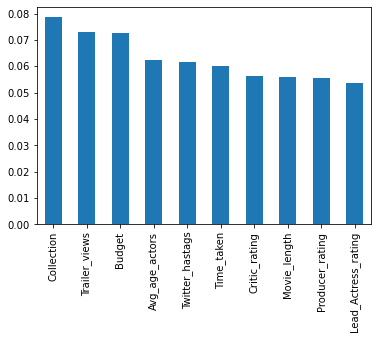

In [11]:
from sklearn.ensemble import ExtraTreesClassifier #importing the Extratree classifier
model = ExtraTreesClassifier() #extratree storing in model variable
model.fit(X, Y) #fitting the X, y features 
feat_importances = pd.Series(model.feature_importances_, index=X.columns) # converting the important features in pd.series 
#assigning wth X features
feat_importances.nlargest(10).plot.bar() #ploting the top 10 features in bar plot 
plt.show() # showing the plot

In [12]:
bestfeatures = SelectKBest(score_func=chi2, k=10)  #choosing the chi2 satistical function to calculate the feature importance 
# and selected 10 best features
fit = bestfeatures.fit(X,Y) #calculating the chi2 formula for X and y features
dfscores = pd.DataFrame(fit.scores_) #converting the chi scores into dataframe
dfcolumns = pd.DataFrame(X.columns) # and columns of those features
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) # printing the top 10 columns along with score

               columns         Score
17          Collection  90457.574008
10       Trailer_views  30620.842724
3               Budget    162.404292
13     Twitter_hastags    127.119151
0    Marketing expense     29.156615
12          Time_taken     12.468627
15      Avg_age_actors      3.323642
11        3D_available      1.124134
4         Movie_length      0.747503
1   Production expense      0.732741


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

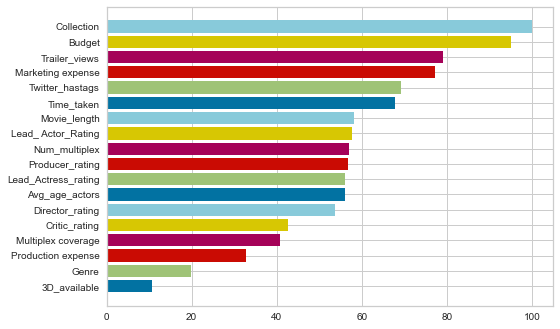

In [13]:
from sklearn.ensemble import RandomForestClassifier # importing randomforest
from yellowbrick.model_selection import FeatureImportances # importing yellow brick for the feature display
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

Get Dummies

In [16]:
X=pd.get_dummies(X) #using get dummies for X categorical features

In [17]:
fsel = FeatureSelector(verbose=1,problem_type='classification') # autofeat for classification feature seection
new_X = fsel.fit_transform(X,Y) #fiting the X and y features 

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 11 features after 5 feature selection runs
[featsel] 8 features after correlation filtering
[featsel] 5 features after noise filtering


In [18]:
new_X #We got 9 important features in dataframe

,Budget,Collection,Trailer_views,Producer_rating,Multiplex coverage
0,36524.125,48000.0,527367.0,7.995,0.462
1,35668.655,43200.0,494055.0,7.470,0.531
2,39912.675,69400.0,547051.0,7.515,0.531
3,38873.890,66800.0,516279.0,7.020,0.542
4,39701.585,72400.0,531448.0,7.070,0.542
...,...,...,...,...,...
501,36624.115,44800.0,492480.0,8.970,0.427
502,33996.600,41200.0,482875.0,8.930,0.427
503,38751.680,47800.0,532239.0,9.010,0.427
504,37740.670,44000.0,496077.0,8.845,0.427


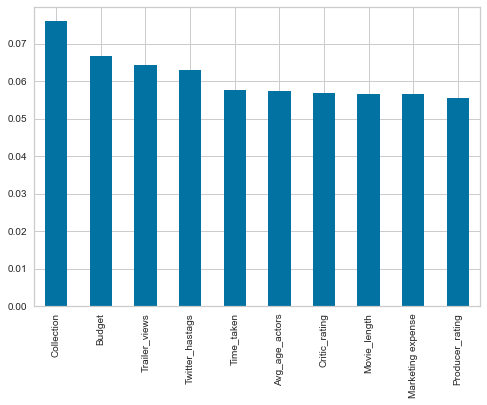

In [19]:
from sklearn.ensemble import ExtraTreesClassifier #importing the Extratree classifier
model = ExtraTreesClassifier() #extratree storing in model variable
model.fit(X, Y) #fitting the X, y features
feat_importances = pd.Series(model.feature_importances_, index=X.columns) # converting the important features in pd.series 
#assigning wth X features
feat_importances.nlargest(10).plot.bar() #ploting the top 10 features in bar plot 
plt.show()  # showing the plot

In [20]:
bestfeatures = SelectKBest(score_func=chi2, k=10) #choosing the chi2 satistical function to calculate the feature importance 
# and selected 10 best features
fit = bestfeatures.fit(X,Y) #calculating the chi2 formula for X and y features
dfscores = pd.DataFrame(fit.scores_) #converting the chi scores into dataframe
dfcolumns = pd.DataFrame(X.columns)  # and columns of those features
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score')) # printing the top 10 columns along with score

              columns         Score
15         Collection  90457.574008
10      Trailer_views  30620.842724
3              Budget    162.404292
12    Twitter_hastags    127.119151
0   Marketing expense     29.156615
11         Time_taken     12.468627
13     Avg_age_actors      3.323642
21     Genre_Thriller      1.713843
20        Genre_Drama      1.542612
16    3D_available_NO      1.381645


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

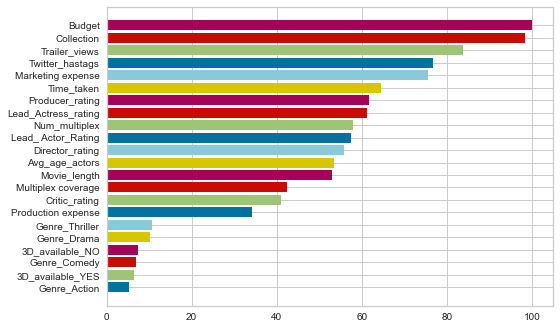

In [21]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

# House

In [38]:
house_df=pd.read_csv('ml360datasets/kc_house.csv')  ##reading kc housedata

In [31]:
from sklearn.preprocessing import LabelEncoder #doing the labelencoder for category columns
le = LabelEncoder()
for col in house_df.columns:
    if (house_df[col].dtypes == "object"):
        house_df[col] = house_df[col].astype(str)
        house_df[col] = le.fit_transform(house_df[col])

In [39]:
X=house_df.drop('sqft_lot15',axis=1) #choosing the features except target variable
Y=house_df['sqft_lot15'] #choosing the target variable

In [33]:
fsel = FeatureSelector(verbose=1,problem_type='regression') # autofeat for regression feature seection
new_X = fsel.fit_transform(X,Y) #fiting the X and y features 

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 7 features after 5 feature selection runs
[featsel] 7 features after correlation filtering
[featsel] 7 features after noise filtering


In [34]:
new_X #We got 6 important features in dataframe

,sqft_lot,floors,sqft_above,waterfront,sqft_living15,long,sqft_basement
0,9373.0,2.0,2400.0,0.0,2060.0,-122.214,0.0
1,26036.0,1.0,1160.0,0.0,2590.0,-122.351,900.0
2,43000.0,1.0,1460.0,0.0,2250.0,-122.347,0.0
3,7599.0,1.5,1010.0,0.0,1290.0,-122.265,420.0
4,3504.0,1.0,760.0,0.0,1480.0,-122.294,890.0
...,...,...,...,...,...,...,...
994,6733.0,1.0,1770.0,0.0,1770.0,-122.360,730.0
995,7975.0,1.0,870.0,0.0,1080.0,-122.361,0.0
996,3440.0,1.5,1480.0,0.0,1520.0,-122.376,540.0
997,3740.0,1.0,770.0,0.0,1090.0,-122.375,770.0


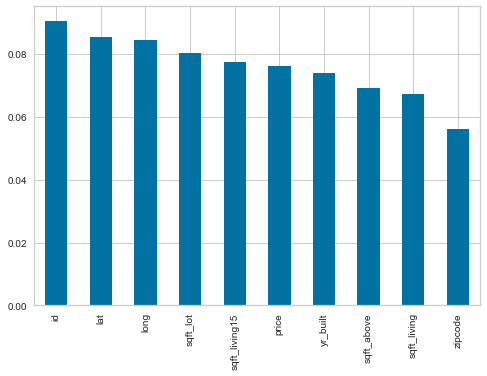

In [35]:
from sklearn.ensemble import ExtraTreesClassifier #importing the Extratree classifier
model = ExtraTreesClassifier()  #extratree storing in model variable
model.fit(X, Y)  #fitting the X, y features
feat_importances = pd.Series(model.feature_importances_, index=X.columns) # converting the important features in pd.series 
#assigning wth X features
feat_importances.nlargest(10).plot.bar() #ploting the top 10 features in bar plot 
plt.show()  # showing the plot

In [36]:
bestfeatures = SelectKBest(score_func=chi2, k=10) #choosing the chi2 satistical function to calculate the feature importance 
# and selected 10 best features
fit = bestfeatures.fit(X,Y) #calculating the chi2 formula for X and y features
#we got error because we have negative column(long) that's why we got an error
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

ValueError: Input X must be non-negative.

FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

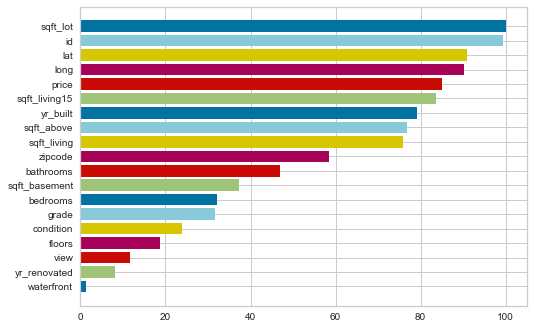

In [37]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

Get Dummies

In [40]:
X=pd.get_dummies(X)  #using get dummies for X categorical features

In [41]:
fsel = FeatureSelector(verbose=1,problem_type='regression') # autofeat for classification feature seection
new_X = fsel.fit_transform(X,Y) #fiting the X and y features 

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 7 features after 5 feature selection runs
[featsel] 7 features after correlation filtering
[featsel] 7 features after noise filtering


In [42]:
new_X#We got 6 important features in dataframe

,sqft_lot,floors,sqft_above,waterfront,sqft_living15,long,sqft_basement
0,9373.0,2.0,2400.0,0.0,2060.0,-122.214,0.0
1,26036.0,1.0,1160.0,0.0,2590.0,-122.351,900.0
2,43000.0,1.0,1460.0,0.0,2250.0,-122.347,0.0
3,7599.0,1.5,1010.0,0.0,1290.0,-122.265,420.0
4,3504.0,1.0,760.0,0.0,1480.0,-122.294,890.0
...,...,...,...,...,...,...,...
994,6733.0,1.0,1770.0,0.0,1770.0,-122.360,730.0
995,7975.0,1.0,870.0,0.0,1080.0,-122.361,0.0
996,3440.0,1.5,1480.0,0.0,1520.0,-122.376,540.0
997,3740.0,1.0,770.0,0.0,1090.0,-122.375,770.0


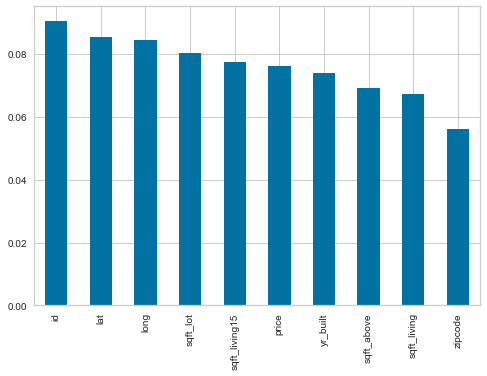

In [43]:
from sklearn.ensemble import ExtraTreesClassifier #importing the Extratree classifier
model = ExtraTreesClassifier()  #extratree storing in model variable
model.fit(X, Y)  #fitting the X, y features
feat_importances = pd.Series(model.feature_importances_, index=X.columns) # converting the important features in pd.series 
#assigning wth X features
feat_importances.nlargest(10).plot.bar()
plt.show()

In [44]:
bestfeatures = SelectKBest(score_func=chi2, k=10) #choosing the chi2 satistical function to calculate the feature importance 
# and selected 10 best features
fit = bestfeatures.fit(X,Y) #calculating the chi2 formula for X and y features
#we got error because we have negative column(long) that's why we got an error
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

ValueError: Input X must be non-negative.

FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

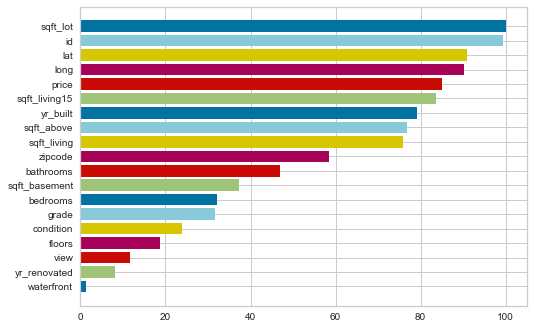

In [45]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

# Loan

In [57]:
loan_df=pd.read_csv('ml360datasets/loan_classification.csv')

In [58]:
loan_df['Gender']=loan_df['Gender'].replace(np.nan,loan_df['Gender'].mode()[0]) # Replacing the Null values
loan_df['Married']=loan_df['Married'].replace(np.nan,loan_df['Married'].mode()[0]) # Replacing the Null values
loan_df['Dependents']=loan_df['Dependents'].replace(np.nan,loan_df['Dependents'].mode()[0]) # Replacing the Null values
loan_df['Self_Employed']=loan_df['Self_Employed'].replace(np.nan,loan_df['Self_Employed'].mode()[0]) # Replacing the Null values
loan_df['Credit_History']=loan_df['Credit_History'].replace(np.nan,loan_df['Credit_History'].mode()[0]) # Replacing the Null values

In [59]:
loan_df['LoanAmount']=loan_df['LoanAmount'].replace(np.nan,loan_df['LoanAmount'].mean()) # Replacing the Null values
loan_df['Loan_Amount_Term']=loan_df['Loan_Amount_Term'].replace(np.nan,loan_df['Loan_Amount_Term'].mean()) # Replacing the Null values

In [60]:
loan_df['Credit_History']=loan_df['Credit_History'].astype('object') #chnaging the datatype

In [50]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in loan_df.columns:
    if (loan_df[col].dtypes == "object"):
        loan_df[col] = loan_df[col].astype(str)
        loan_df[col] = le.fit_transform(loan_df[col])

In [61]:
X=loan_df.drop('Loan_Status',axis=1)
Y=loan_df['Loan_Status']

In [52]:
fsel = FeatureSelector(verbose=1,problem_type='classification')
new_X = fsel.fit_transform(X,Y)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 4 features after 5 feature selection runs
[featsel] 4 features after correlation filtering
[featsel] 3 features after noise filtering


In [53]:
new_X

,Married,Credit_History,CoapplicantIncome
0,0.0,1.0,0.0
1,1.0,1.0,1508.0
2,1.0,1.0,0.0
3,1.0,1.0,2358.0
4,0.0,1.0,0.0
...,...,...,...
609,0.0,1.0,0.0
610,1.0,1.0,0.0
611,1.0,1.0,240.0
612,1.0,1.0,0.0


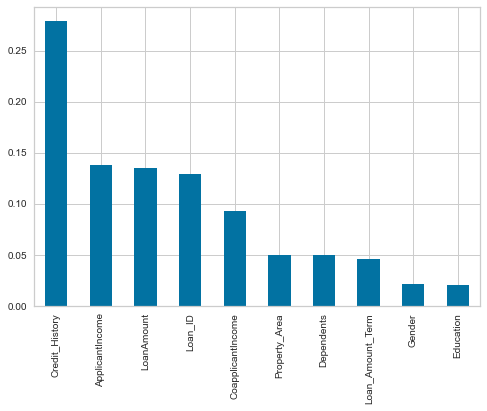

In [54]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [55]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

              columns         Score
7   CoapplicantIncome  11342.041603
6     ApplicantIncome     93.904964
8          LoanAmount     39.211545
10     Credit_History     26.005877
0             Loan_ID      8.723627
4           Education      3.540502
9    Loan_Amount_Term      3.267315
2             Married      1.782425
11      Property_Area      0.377837
3          Dependents      0.085953


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

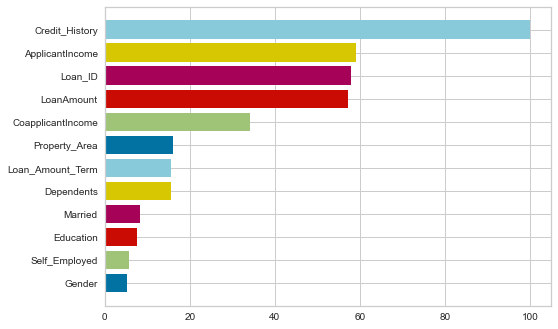

In [56]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

Get Dummies

In [62]:
X=pd.get_dummies(X)

In [63]:
fsel = FeatureSelector(verbose=1,problem_type='classification')
new_X = fsel.fit_transform(X,Y)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 13 features after 5 feature selection runs
[featsel] 12 features after correlation filtering
[featsel] 8 features after noise filtering


In [64]:
new_X

,Credit_History_0.0,Property_Area_Semiurban,Loan_ID_LP002318,Loan_ID_LP001326,Loan_ID_LP002949,Loan_ID_LP001722,Loan_ID_LP001656,Loan_ID_LP001925
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
609,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
612,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


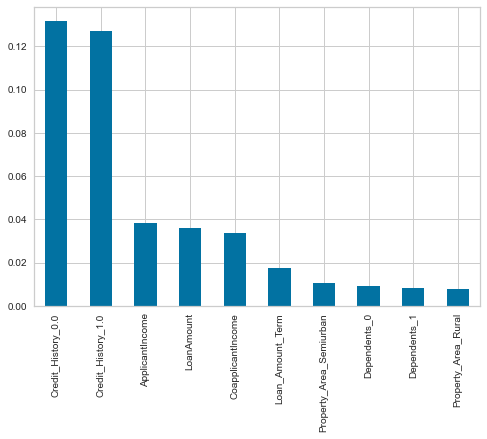

In [65]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()

In [66]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                     columns         Score
1          CoapplicantIncome  11342.041603
632       Credit_History_0.0    153.405455
0            ApplicantIncome     93.904964
2                 LoanAmount     39.211545
633       Credit_History_1.0     26.005877
635  Property_Area_Semiurban      7.103093
634      Property_Area_Rural      4.410584
629   Education_Not Graduate      3.540502
622               Married_No      3.355645
3           Loan_Amount_Term      3.267315


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

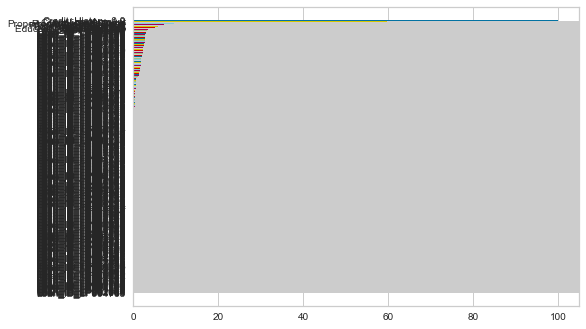

In [67]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

# Wine

In [77]:
wine_df=pd.read_csv('ml360datasets/winequality-white.csv')

In [69]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in wine_df.columns:
    if (wine_df[col].dtypes == "object"):
        wine_df[col] = wine_df[col].astype(str)
        wine_df[col] = le.fit_transform(wine_df[col])

In [78]:
X=wine_df.drop('quality',axis=1)
Y=wine_df['quality']

In [71]:
import autofeat
from autofeat import AutoFeatClassifier
from autofeat import FeatureSelector

In [72]:
fsel = FeatureSelector(verbose=1,problem_type='classification')
new_X = fsel.fit_transform(X,Y)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 6 features after 5 feature selection runs
[featsel] 6 features after correlation filtering
[featsel] 5 features after noise filtering


In [73]:
new_X

,pH,fixed acidity,density,chlorides,residual sugar
0,3.00,7.0,1.00100,0.045,20.7
1,3.30,6.3,0.99400,0.049,1.6
2,3.26,8.1,0.99510,0.050,6.9
3,3.19,7.2,0.99560,0.058,8.5
4,3.19,7.2,0.99560,0.058,8.5
...,...,...,...,...,...
4893,3.27,6.2,0.99114,0.039,1.6
4894,3.15,6.6,0.99490,0.047,8.0
4895,2.99,6.5,0.99254,0.041,1.2
4896,3.34,5.5,0.98869,0.022,1.1


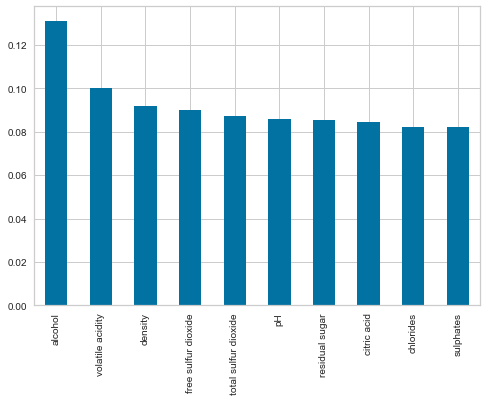

In [74]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [75]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                 columns        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636
0          fixed acidity     7.922042
4              chlorides     2.529005
2            citric acid     0.851118
9              sulphates     0.579206
8                     pH     0.428745


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

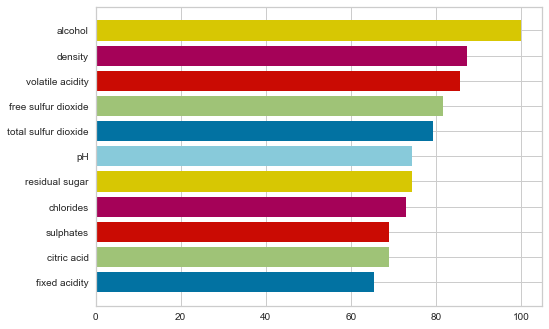

In [76]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 

Get Dummies

In [79]:
X=pd.get_dummies(X)

In [80]:
fsel = FeatureSelector(verbose=1,problem_type='classification')
new_X = fsel.fit_transform(X,Y)

[featsel] Scaling data...done.
[featsel] Feature selection run 1/5
[featsel] Feature selection run 2/5
[featsel] Feature selection run 3/5
[featsel] Feature selection run 4/5
[featsel] Feature selection run 5/5
[featsel] 6 features after 5 feature selection runs
[featsel] 6 features after correlation filtering
[featsel] 5 features after noise filtering


In [81]:
new_X

,pH,fixed acidity,density,chlorides,residual sugar
0,3.00,7.0,1.00100,0.045,20.7
1,3.30,6.3,0.99400,0.049,1.6
2,3.26,8.1,0.99510,0.050,6.9
3,3.19,7.2,0.99560,0.058,8.5
4,3.19,7.2,0.99560,0.058,8.5
...,...,...,...,...,...
4893,3.27,6.2,0.99114,0.039,1.6
4894,3.15,6.6,0.99490,0.047,8.0
4895,2.99,6.5,0.99254,0.041,1.2
4896,3.34,5.5,0.98869,0.022,1.1


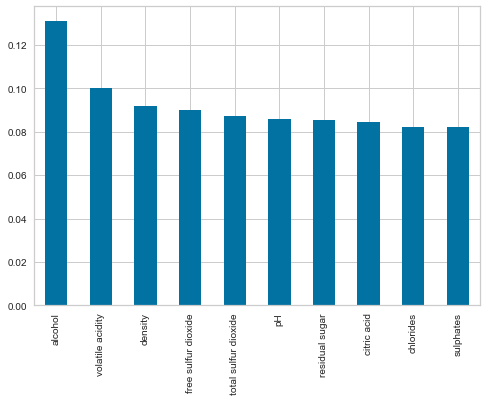

In [82]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, Y)
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot.bar()
plt.show()
list1=feat_importances.keys().to_list()

In [83]:
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['columns','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))

                 columns        Score
6   total sulfur dioxide  3358.298433
5    free sulfur dioxide   947.712845
3         residual sugar   501.235224
10               alcohol   155.078234
1       volatile acidity    12.622636
0          fixed acidity     7.922042
4              chlorides     2.529005
2            citric acid     0.851118
9              sulphates     0.579206
8                     pH     0.428745


FeatureImportances(ax=<AxesSubplot:>, estimator=RandomForestClassifier())

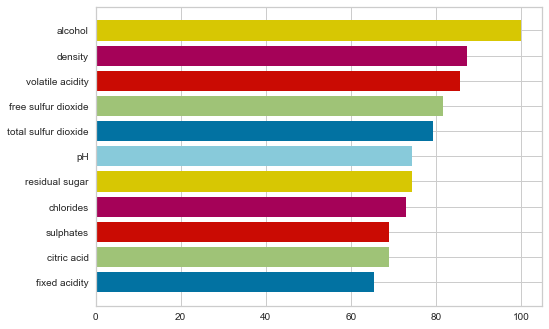

In [84]:
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.model_selection import FeatureImportances
model = RandomForestClassifier()
viz = FeatureImportances(model)
viz.fit(X, Y)#fitting using one hot encoding 